In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import csv
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import spacy
from bs4 import BeautifulSoup
import time

In [44]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
file_1 = "/content/gdrive/My Drive/data/data.csv"

In [46]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
print(stopWords)

also_remove = ['  ' , '.' , '..' , '...' , '[' , ']', '}', '{', '(' , ')' ,',']

{'his', 'all', 'ourselves', 'wasn', 'or', 'with', 'as', 'i', 'to', 'yourselves', 'both', 'ma', 'shouldn', "wouldn't", "should've", 'from', 'yourself', 'why', 'other', 'these', 'd', 'they', "won't", "hadn't", 'then', 'not', 'been', 'themselves', 'of', 'be', 'has', 'most', 'during', 'you', 'your', 'her', 'more', 'he', 'does', 'wouldn', 'against', 'very', 'll', 'being', 'the', 'and', 'an', "wasn't", 'until', 'aren', 'didn', 'because', 'how', "mustn't", 'hadn', 'its', 'doesn', 'once', "isn't", 'was', 'when', 'hasn', 'so', 'who', 'this', 'will', 'nor', "aren't", 'over', 'here', 't', 'o', 'weren', 'theirs', 'while', 'do', 'those', "hasn't", 'again', 'mustn', 'couldn', "you'd", 'itself', 'too', 'me', 'our', "haven't", 've', "didn't", "couldn't", 'that', 'is', 'into', 'any', 'y', 'by', "shouldn't", 'some', "you've", 'on', 'off', 'him', 'have', 'having', 'for', 'at', 'hers', 'through', 'after', "weren't", 'it', 'what', 'had', 're', 'did', 'under', 'should', 'up', 'such', 'no', 'only', 'ours', '

In [47]:
reviews = []
labels = []

start_time = time.time()

with open(file_1 , 'r') as csvfile:
  reader = csv.reader(csvfile , delimiter = ',')
  next(reader)
  for row in reader:
    if row[1] == "positive": labels.append(1)
    if row[1] == "negative" : labels.append(0)
    # labels.append(row[1])
    review = row[0].lower()
    BeautifulSoup(review, "lxml")                                               #remove html tags
    review = review.replace('[^\w\s]','')                                       #remove puntuations
    review = review.replace("<br /><br />"," ")                                 #remove particular tags
    review = "".join([i for i in review if not i.isdigit()])                    #remove_digits
    for word in stopWords:                                                      #remove stopwords
      stopword = " " + word + " "
      review = review.replace(stopword , " ")
    for i in also_remove:
      review = review.replace(i,"")
    reviews.append(review)

print(f'Time taken : {(time.time() - start_time) / 60:.2f} mins')

Time taken : 0.73 mins


In [48]:
print("review : ",reviews[0])

review :  one reviewers mentioned watchingoz episode hooked right exactly happened me first thing struck oz brutality unflinching scenes violence set right word go trust me show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz mess around first episode ever saw struck nasty surreal say ready it watched more developed taste oz got accustomed high levels graphic violence violence injustice crooked guards who'll sold nickel inmates who'll kill order get away it well mannered middle class inmates

In [0]:
#  stemming and lemmatization

# from nltk.corpus import wordnet
# from nltk.stem import WordNetLemmatizer

# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')

# lemmatizer = WordNetLemmatizer()

# wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV} # Pos tag, used Noun, Verb, Adjective and Adverb

# for review in reviews:
#   pos_tagged_text = nltk.pos_tag(review.split())
#   review = " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

In [50]:
max_len = 0

for review in reviews:
  length = len(review)
  if length>max_len : max_len = length

print("max_len :",max_len)
print("total reviews: ", len(reviews))

max_len : 9452
total reviews:  50000


In [0]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
oov_tok = "<OOV>"
vocab_size = 10000
max_len = 200

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(reviews[:3000])
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(reviews[:3000])
padded = pad_sequences(sequences,maxlen=200, truncating="post")

In [52]:
padded = padded[:3000]
print(padded[0])
            

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    4 1900  790    1  337 2529  109  534
  659  141   19   66 2530 2094 7608    1   53  428  188  109  418   54
 1901  141   47 6739 1740    1   47 2531 5072 3889 1043  297  428 3143
  273  244  418  330 2094    1  240 8799 3450 3290 1254    1 2324 1131
    1  446 4708 3890 1064 4374 2994 6060  316    1    1  214 6061 7609
  446  232    1 4375    1    1 6062 6063 2238    1    1  295 5536 6064
 5537    1    1   38  138  147    9   50  193 1184   47  579   99  179
  202 2413  669   85 1383 3891 2414  928  669 1468  669    1 1008   94
   19  337   46  125 2530 1227 1780   50 1255    8  189  602 1185 1132
 2094   89 6740  214 2325 1841  428  428 7610 6741 5073    1 2640    1
    1    1  508  603   16  147    8   14 8800  562  558    1  638 1064
    1  579  395  985 2027 1064  410   58 2094  101  368 2641 3643    1
   16 

In [0]:
training_set = []

for row in range(padded.shape[0]):
  train = []
  for col in range(padded.shape[1]):
    train.append(padded[row][col])
  training_set.append(train)

In [54]:
padded_train = training_set[:2000]
padded_test = training_set[2000:3000]
print(type(training_set))
print(training_set[0])

<class 'list'>
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1900, 790, 1, 337, 2529, 109, 534, 659, 141, 19, 66, 2530, 2094, 7608, 1, 53, 428, 188, 109, 418, 54, 1901, 141, 47, 6739, 1740, 1, 47, 2531, 5072, 3889, 1043, 297, 428, 3143, 273, 244, 418, 330, 2094, 1, 240, 8799, 3450, 3290, 1254, 1, 2324, 1131, 1, 446, 4708, 3890, 1064, 4374, 2994, 6060, 316, 1, 1, 214, 6061, 7609, 446, 232, 1, 4375, 1, 1, 6062, 6063, 2238, 1, 1, 295, 5536, 6064, 5537, 1, 1, 38, 138, 147, 9, 50, 193, 1184, 47, 579, 99, 179, 202, 2413, 669, 85, 1383, 3891, 2414, 928, 669, 1468, 669, 1, 1008, 94, 19, 337, 46, 125, 2530, 1227, 1780, 50, 1255, 8, 189, 602, 1185, 1132, 2094, 89, 6740, 214, 2325, 1841, 428, 428, 7610, 6741, 5073, 1, 2640, 1, 1, 1, 508, 603, 16, 147, 8, 14, 8800, 562, 558, 1, 638, 1064, 1, 579, 395, 985, 2027, 1064, 410, 58, 2094, 101, 368, 2641, 3643, 1, 16, 1256, 4709, 483]


In [0]:
#CBOW_MODEL
context_word = []
target_word = []



window_size = 2

for sentence in padded_train:
  for i,word in enumerate(sentence):
    

    if i- window_size >= 0 and i+ window_size < len(sentence):
      # w = np.zeros((vocab_size+1,1))
      # w[word] = 1
      target_word.append(word)
      context = []

      for j in range(i-window_size ,i+window_size +1):
        if j!= i: 
          # w = np.zeros((vocab_size+1,1))
          # w[sentence[j]] = 1
          context.append(sentence[j])

      context_word.append(context)

    

In [0]:
test_context_word = []
test_target_word = []

window_size = 2

for sentence in padded_test:
  for i,word in enumerate(sentence):
    # w = np.zeros((vocab_size+1,1))
    # w[word] = 1
    test_target_word.append(word)
    test_context = []

    if i- window_size >= 0 and i+ window_size < len(sentence):

      for j in range(i-window_size ,i+window_size +1):
        if j!= i: 

          # w = np.zeros((vocab_size+1,1))
          # w[sentence[j]] = 1
          test_context.append(sentence[j])

      test_context_word.append(context)

In [67]:
len(test_context_word)

196000

In [71]:
type(test_target_word[0])

numpy.int32

In [61]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding , Dense
from keras.losses import SparseCategoricalCrossentropy
embedding_dim = 32
max_length = 4
model = tf.keras.Sequential([
         tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
         tf.keras.layers.Flatten(),     
         tf.keras.layers.Dense(vocab_size, activation='softmax')
         ])

model.compile(loss="SparseCategoricalCrossentropy",optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 4, 32)             320000    
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10000)             1290000   
Total params: 1,610,000
Trainable params: 1,610,000
Non-trainable params: 0
_________________________________________________________________


In [0]:
context_word = np.array(context_word)
target_word = np.array(target_word)
test_context_word = np.array(test_context_word)
test_target_word = np.array(test_target_word)

In [72]:
num_epochs = 5
MODEL = model.fit(context_word , target_word , epochs=num_epochs)

Epoch 1/5
12250/12250 [==============================] - 254s 21ms/step - loss: 3.8176 - accuracy: 0.5221
Epoch 2/5
12250/12250 [==============================] - 253s 21ms/step - loss: 3.5364 - accuracy: 0.5278
Epoch 3/5
12250/12250 [==============================] - 245s 20ms/step - loss: 3.3039 - accuracy: 0.5333
Epoch 4/5
12250/12250 [==============================] - 242s 20ms/step - loss: 3.1260 - accuracy: 0.5385
Epoch 5/5
12250/12250 [==============================] - 241s 20ms/step - loss: 2.9913 - accuracy: 0.5433


KeyError: ignored

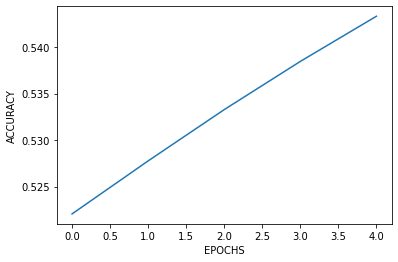

In [73]:
import matplotlib.pyplot as plt

plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.plot(MODEL.history["accuracy"])
# plt.plot(MODEL.history["val_accuracy"])
# plt.legend(['accuracy','val_accuracy'])
plt.title("accuray vs epochs")


Text(0.5, 1.0, 'loss  vs epochs')

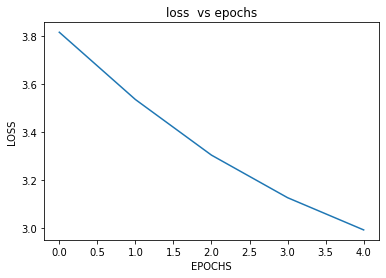

In [74]:

plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.plot(MODEL.history["loss"])
# plt.plot(MODEL.history["val_loss"])
# plt.legend(["loss","val_loss"])
plt.title("loss  vs epochs")